<a href="https://colab.research.google.com/github/rahultheogre/Google-Store-App-Rating-Prediction-DT-RF-GB-Stacked-/blob/main/Google_Store_App_Rating_Prediction_(DT_RF_GB_Stacked).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Convert ratings to high and low categories(>3.5 is high rest low) and store it in a new column ‘Rating_category’. Check the distribution of the newly created column 'Rating_category' and comment on the distribution. 
- Check the column 'Installs', handle the unwanted characters and convert the column into suitable dataype. 
- Check the column 'Price', remove the unwanted characters and convert the column into suitable datatype.

### CONTEXT:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable. It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful. We can collect app
data and user ratings from the app stores and use it to extract insightful information. A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 

### PROJECT OBJECTIVE:
The Goal is to predict the rating for an app based on the given input features like size, number of downloads etc. 

### DATA DESCRIPTION: 
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for category, rating, size, and more. 
1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app
4. Reviews: Number of user reviews for the app
5. Size: Size of the app
6. Installs: Number of user downloads/installs for the app
7. Type: Paid or Free
8. Price: Price of the app
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10. Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres. 
11. Last Updated: Date when the app was last updated on Play Store
12. Current Ver: Current version of the app available on Play Store
13. Android Ver: Min required Android version

# 1. Import required libraries and read the data

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 
pd.set_option('display.max_columns', None)                              
pd.set_option('display.max_colwidth', None)                           
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt 
#plt.style.use('dark_background')
import seaborn as sns                                              
sns.set(style='whitegrid')
sns.color_palette('dark')
%matplotlib inline

from scipy import stats

#suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#for string manipulation
import re

In [2]:
#df = pd.read_csv('Apps_data.csv')
#df = pd.read_csv('/content/drive/MyDrive/IIITD Projects/Advanced Machine Leasning/AML Project 1/Apps_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/rahultheogre/Google-Store-App-Rating-Prediction-DT-RF-GB-Stacked-/main/Apps_data.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.70000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.00000,NaN,NaN,NaN,4.19334,0.53743,1.00000,4.00000,4.30000,4.50000,19.00000
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data cleansing and Exploratory data analysis



## Dealing with Duplicate Entries, Unnecessary features and Missing Values

In [6]:
def ifDuplicateSamples(data):
  NoOfDuplicateRows = data.duplicated().sum()
  if NoOfDuplicateRows == 0:
    print("There are no duplicate rows")
    return
  else:
    print("There are ",NoOfDuplicateRows,"duplicate rows")

In [7]:
ifDuplicateSamples(df)

There are  483 duplicate rows


In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

The duplicate samples have been removed.

### Renaming a few features names for easy accessibility

In [9]:
df.rename(columns = {'Content Rating':'ContentRating', 'Last Updated':'LastUpdated','Current Ver':'CurrentVer','Android Ver':'AndroidVer'}, inplace=True)

### Missing Value Imputation

In [10]:
def missing_data(df):
  missing_data = pd.DataFrame({'net_missing': df.isnull().sum(), '%missing': (df.isnull().sum()/len(df))*100})
  print(missing_data)

missing_data(df)

               net_missing  %missing
App                      0   0.00000
Category                 0   0.00000
Rating                1465  14.14366
Reviews                  0   0.00000
Size                     0   0.00000
Installs                 0   0.00000
Type                     1   0.00965
Price                    0   0.00000
ContentRating            1   0.00965
Genres                   0   0.00000
LastUpdated              0   0.00000
CurrentVer               8   0.07723
AndroidVer               3   0.02896


'Rating','Type','Content Rating','Current Ver','Android Ver'

### LastUpdated

- We can also do away with LastUpdated for obvious reasons.
- We Last update has also no saying on the rating of an app. 
- One, we do not have the current date, and two: even if we have, we would rather know the quality of update than the time spent since last update.

In [11]:
df = df.drop(columns=['LastUpdated'])

### Category and Genres

Let's check the classes of these two features. From a preliminary glance, it appears that many of them overlap across the two feature.

In [12]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

The last class in the list of classes is '1.9', a rather dubious name. Let's check.

In [13]:
df[df.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",4.0 and up,NaN


- This sample needs to be dropped.
- Its Rating is 19. It has the only Null value in ContentRating feature.

In [14]:
df.drop(df[df['Category'] == '1.9'].index, inplace = True)

In [15]:
df['Genres'].value_counts()

Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

- There are 33 different classes of 'Category' and 118 different classes of 'Genres'.
- Many classes of 'Genres' have only one member.
- An important point when filling the genres of an app, the uploader might try to click on as many options as possible. It is representative of the uploader's mind. An expert android developer would be careful these Genres, whereas newbies might be overzealous about increasing the reach of the app.
- Anyway, a few categories can be clubbed into other categories, which is case with genres as well. 
- Business knowledge: An analysis of Google Store policies, and my own experience in developing an android app tells me that there are many genres an app belongs to. 
- Genres can even be connected with the tags the app uploader attaches with the app for better search. 
- Most importantly, Genres are about going a little deeper into the functionality of the app in question. It has to do with going deeper into an app's usecase.
- But this is what we desire. We do not want too many classes at hand. It will give rise to curse of dimensionality if we choose one-hot-encoding, and unnecessary ranking of the classes if we use Label Encoding. 
- We are going to employ Decision Tree algorithm (which will overfit more if the number of classes of features is high) and then a league of COMPUTATIONALLY EXPENSIVE ensembling techniques. 
- We don't have that resources at hand. Also, time is a factor. 
- Because an algorithm should be able to take in LIVE data fed in the form of a stream and process that incoming data into something fruitful. 
- Developing an algorithm which depends on the staticity of the data is not a good idea in this case.
- So in this project, I am going to a little more aggressive towards reduing computation time at expense of accuracy.
- So, presently, I'll remove the feature Genres. And later I am going to engineer the 'Category' feature to have as less number of classes as possible. 

In [16]:
df = df.drop(columns=['Genres'])

### App

- The feature 'App' can be removed. We don't need the names of the apps for their analysis. But before removing this feature, let me first be sure if the names are not repeated.

In [ ]:
df.App.duplicated().sum()

698

- So, clearly, a few apps have duplicated entries with changes in other features. Let me have a glimpse.

In [ ]:
df.App.describe()

count      10357
unique      9659
top       ROBLOX
freq           9
Name: App, dtype: object

- ROBLOX has maximum representation. Let's check it.

In [ ]:
df[df.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,CurrentVer,AndroidVer
1653,ROBLOX,GAME,4.50000,4447388,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.50000,4447346,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.50000,4448791,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.50000,4449882,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.50000,4449910,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.50000,4449910,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.50000,4450855,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.50000,4450890,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.50000,4443407,67M,"100,000,000+",Free,0,Everyone 10+,2.347.225742,4.1 and up


- Everything except 'Reviews' and 'Category' is same for all duplicate samples of ROBLOX.
- We seem to have data of different times. Maybe at some time, they decided to change the category of the app.
- So, I would choose number of reviews to be a defining criteria. The latest update should have bigger number of reviews (though it's mysterious how the rating can be same across). 
- But let's not cogitate more. And drop rest of the samples, except for one, the first one. Review number don't change much.
- Number of reviews is more important a feature when it comes to decidng the Rating.
- I will follow the same routine with rest of duplicate samples.

In [ ]:
df = df.drop_duplicates(subset=['App'], keep='first')

Now, let's drop the feature 'App' altogether.

In [ ]:
df.drop(columns = ['App'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Current Ver and Android Ver

- These two features do not have any role to play in making a user decide the rating they give to an app. Most of the users have no idea what these versions stand for. 
- Even the extreme geek users do not look at the version number and android version before giving a thumbs up or down to the app.
- So, we should drop these feature altogether.

In [17]:
df = df.drop(columns = ['AndroidVer','CurrentVer'])

### Type

In [18]:
df.Type.value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

In [19]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+


It's clear that we have to impute missing values with 'Free'

In [20]:
df.Type.fillna('Free', inplace=True)

### Rating

In [21]:
df.Rating.describe()

count   8892.00000
mean       4.18788
std        0.52238
min        1.00000
25%        4.00000
50%        4.30000
75%        4.50000
max        5.00000
Name: Rating, dtype: float64

- We don't any Rating with value over 5. There was one with value 19, but we have already gotten rid of it. 
- Now, 15 percent of the samples have missing 'Rating' values 
- This is a significant number specially when we consider the fact that 'Rating' is the feature to be predicted. 
- We have to be careful about our analysis. We cannot just feed medians without proper justification.
- Let's draw the boxplot to understand the range of ratings. 

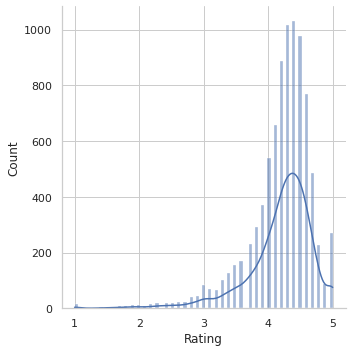

In [22]:
sns.displot(x=df.Rating,kde=True)
plt.show()

- The ratings are highly left skewed and most of the values are around 4.4.
- Generally on Goole Store, we do find such trend. People give the rating highly if the product is free and it serves the purpose. 
- Low ratings are given to particular products only. 
- Let's check the corresponding number of downloads. I would be careful about giving someone a very high rating with very large userbase, because that is a rare case.

In [23]:
df[df['Rating'].isna()].sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating
10331,Caprock Santa Fe Credit Union,FINANCE,NaN,0,2.9M,100+,Free,0,Everyone
6638,BQ Llicència,SPORTS,NaN,18,Varies with device,"5,000+",Free,0,Everyone
6843,Bu Hangi Film ?,FAMILY,NaN,3,25M,100+,Free,0,Everyone
9937,NativeScript Developer Day EU,BUSINESS,NaN,2,12M,100+,Free,0,Everyone
9916,EU IP Codes,BOOKS_AND_REFERENCE,NaN,2,970k,100+,Free,0,Everyone
9417,Sensenuts eI,BUSINESS,NaN,0,Varies with device,5+,Free,0,Everyone
4273,J. Polep Plus Mobile,PRODUCTIVITY,NaN,0,44M,100+,Free,0,Everyone
5266,AJ렌터카 법인 카셰어링,MAPS_AND_NAVIGATION,NaN,0,27M,10+,Free,0,Everyone
9131,dekoreko-dz,SHOPPING,NaN,16,4.6M,500+,Free,0,Everyone
10528,FK Oleksandria,SPORTS,NaN,0,26M,10+,Free,0,Everyone


- It appears that most of samples that have missing Rating have a very low number of installs.
- We would not go into why there were missing ratings in the first place. We would focus on what we would do with them.
- Business study: We know for a fact that whenever an uploader uploads their app, they make sure it has ratings on the higher side by asking their friends and family. 
- So even if they have a very high value, they do not correspond to usual user behavior. So manybe dropping the samples with no Rating would be a good idea.
- In addition, Rating is out predictive feature. We cannot feed in missing values of this feature with artificial data just that. We have to drop all the samples with null Rating values.

In [24]:
df = df.dropna(subset=['Rating']) 

Let's check the status of missing values now.

In [25]:
missing_data(df)

               net_missing  %missing
App                      0   0.00000
Category                 0   0.00000
Rating                   0   0.00000
Reviews                  0   0.00000
Size                     0   0.00000
Installs                 0   0.00000
Type                     0   0.00000
Price                    0   0.00000
ContentRating            0   0.00000


And thus, we don't have missing values in the dataset anymore.

In [26]:
df1 = df.copy()

### Installs

## EDA and Feature Engineering

My approach is to analyze each feature one by one and take any actions if needed. 

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            8892 non-null   object 
 1   Category       8892 non-null   object 
 2   Rating         8892 non-null   float64
 3   Reviews        8892 non-null   object 
 4   Size           8892 non-null   object 
 5   Installs       8892 non-null   object 
 6   Type           8892 non-null   object 
 7   Price          8892 non-null   object 
 8   ContentRating  8892 non-null   object 
dtypes: float64(1), object(8)
memory usage: 694.7+ KB


### Installs

In [28]:
df1.value_counts('Installs')

Installs
1,000,000+        1486
10,000,000+       1132
100,000+          1110
10,000+            989
1,000+             698
5,000,000+         683
500,000+           516
50,000+            462
5,000+             426
100,000,000+       369
100+               303
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
dtype: int64

We will use extract operator on the Series, extract the numerical values from the strings and then typecaste them into numerals.

In [30]:
df1['Installs'] = df1['Installs'].str.extract("([0-9]+)", expand=True).apply(pd.to_numeric)

In [31]:
df1['Installs'].describe()

count   8892.00000
mean      71.46041
std      137.72105
min        1.00000
25%        1.00000
50%       10.00000
75%      100.00000
max      500.00000
Name: Installs, dtype: float64

### Category

In [ ]:
df1['Category'].value_counts()

FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

- These categories have been suggested by Google, and we have to take them as they are. 
- One this is clear now. I am going to LabelEncode data and I will not use Parametric algorithms which tend to rate a data as high or low based on its mathematical value.


### Review

In [ ]:
df1.Reviews.describe().T

count     8196
unique    5321
top          2
freq        82
Name: Reviews, dtype: object

- This feature contains how many reviews the app has gotten. But they are in string/object form. We have to convert them into numeric.
- If we are not able to convert a few into numeric, it would mean that those are non-numeric, and we will get rid of those samples.

In [ ]:
df1.Reviews = [int(x) for x in df1.Reviews]

In [ ]:
df1.Reviews.describe().T

count       8196.00000
mean      255251.47072
std      1985593.84804
min            1.00000
25%          126.00000
50%         3004.00000
75%        43813.00000
max     78158306.00000
Name: Reviews, dtype: float64

- Clearly the distribution of Reviews column is highly skewed, with mean much greater than mean.
- Let's check the boxplot

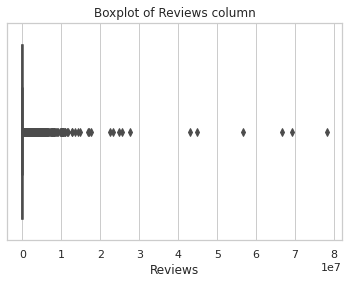

In [ ]:
sns.boxplot(data=df1,x='Reviews')
plt.title('Boxplot of Reviews column')
plt.show()

- We have to transform this column. 
- Since all are non zero positive values, we can apply log transformation.
- But I would attempt box cox transformation, which checks which is the best transformation technique, including log, and uses that.
- Details can be found at https://www.geeksforgeeks.org/box-cox-transformation-using-python/
- 

In [ ]:
df1['Reviews'], fitted_lambda = stats.boxcox(df1['Reviews'])
print(fitted_lambda)

0.005331715877813747


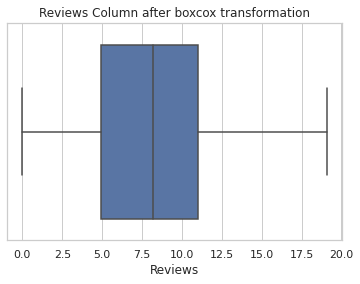

In [ ]:
sns.boxplot(data=df1,x='Reviews')
plt.title('Reviews Column after boxcox transformation')
plt.show()

Thus, we have successful transformed the column with lambda = 0.005331715877813747

### Size

- The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into suitable datatype. (hint: Replace M with 1 million and K with 1 thousand, and drop/impute the entries where size='Varies with device'). 

Size feature contains values of size of the apps.

In [ ]:
df1.head(50)

,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating
0,ART_AND_DESIGN,4.10000,5.13802,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.90000,7.00173,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.70000,11.73181,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.50000,12.69240,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.30000,7.00173,2.8M,"100,000+",Free,0,Everyone
5,ART_AND_DESIGN,4.40000,5.18846,5.6M,"50,000+",Free,0,Everyone
6,ART_AND_DESIGN,3.80000,5.25403,19M,"50,000+",Free,0,Everyone
7,ART_AND_DESIGN,4.10000,10.81392,29M,"1,000,000+",Free,0,Everyone
8,ART_AND_DESIGN,4.40000,9.77813,33M,"1,000,000+",Free,0,Everyone
9,ART_AND_DESIGN,4.70000,4.85763,3.1M,"10,000+",Free,0,Everyone


In [ ]:
df1['Size'].describe().T

count                   8196
unique                   414
top       Varies with device
freq                    1169
Name: Size, dtype: object

The above statistical summary indicates presence of Alphanumeric values in the Size column. Let's check value counts()

In [ ]:
df1.Size.head(50)

0                    19M
1                    14M
2                   8.7M
3                    25M
4                   2.8M
5                   5.6M
6                    19M
7                    29M
8                    33M
9                   3.1M
10                   28M
11                   12M
12                   20M
13                   21M
14                   37M
15                  2.7M
16                  5.5M
17                   17M
18                   39M
19                   31M
20                   14M
21                   12M
22                  4.2M
24                   23M
25                  6.0M
26                   25M
27                  6.1M
28                  4.6M
29                  4.2M
30                  9.2M
31                  5.2M
32                   11M
33                   11M
34                  4.2M
35                  9.2M
36                   24M
37    Varies with device
38                   11M
39                  9.4M
40                   15M


- A huge number of entries have the value = 'Varies with device'
- Rest of the values have either M (MegaByte) or k(KiloByte) in front of a numeric.
- Let's deal with them one by one.
- I will remove convert everything into kilobytes. (kb)
- We know that 1 MegaByte = 1000 KiloByte
- So, I will multiply those values we have M in front with 1000

- Since we have no information, we will impute these values with the average of the rest of the values. 
- That way these devices won't  affect our prediction.

In [ ]:
#df.loc[df[‘column’] condition, ‘new column name’] = ‘value if condition is met’

In [ ]:
#df['First Season'].loc[(df['First Season'] > 1990)] = 1

In [ ]:
#df['Fee'] = np.where(df['Fee'] >= 22000, 15000, df['Fee'])

In [ ]:
#df1['Size']  = np.where(df1['Size'][-1] == 'M' , df1['Size'][0:-1] , df1['Size'])

In [ ]:
#df.loc[df['col1'] == value]

In [ ]:
#df["weight"] = df["weight"].str.extract("([0-9]+)", expand=True).apply(pd.to_numeric)

In [ ]:
df1.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8196, dtype: object

In [ ]:
df1['temp_size'] = df1['Size'].apply(lambda x: x[-1])

In [ ]:
for x in df1:
  if x['temp_size'] == 

In [ ]:
df1 = df1.apply(lambda x: float(x[:-1])*1000 if x[-1]=='M' else float(x[:-1]))

SyntaxError: ignored

In [ ]:
df1.Size

0              19000.00000
1              14000.00000
2               8700.00000
3              25000.00000
4               2800.00000
               ...        
10834           2600.00000
10836          53000.00000
10837           3600.00000
10839    Varies with devic
10840          19000.00000
Name: Size, Length: 8196, dtype: object

In [ ]:
for index, row in df1.iterrows():
  if row['Size'] == 'Varies with device':
    row['Size'] = None

  elif row['Size'][-1] == 'M': 
    row['Size'] = float(row['Size'][:-1])*1000
  else : 
    row['Size'] = float(row['Size'][:-1])


df[‘new column name’] = df[‘column name’].apply(lambda x: ‘value if condition is met’ if x condition else ‘value if condition is not met’) 
df1['Size'] = df1['Size'].apply(lambda x: None if x== 'Varies with device' elif float(x[:-1])*1000) if x[-1]=='M' else x[:-1]) 

Streaming output truncated to the last 5000 lines.
7600.0
26000.0
13000.0
62000.0
10000.0
57000.0
51000.0
24000.0
29000.0
3100.0
55000.0
19000.0
40000.0
43000.0
50000.0
13000.0
4000.0
44000.0
22000.0
12000.0
46000.0
7600.0
4100.0
8500.0
31000.0
4100.0
22000.0
28000.0
5900.0
3900.0
15000.0
4300.0
5300.0
16000.0
7500.0
5800.0
17000.0
8500.0
9100.0
7600.0
2500.0
15000.0
6100.0
17000.0
58000.0
4600.0
16000.0
1300.0
2300.0
1900.0
2700.0
16000.0
11000.0
5300.0
4200.0
9100.0
4300.0
1800.0
8500.0
4400.0
3800.0
11000.0
11000.0
7400.0
5300.0
5400.0
3600.0
4300.0
27000.0
1800.0
3300.0
2000.0
6100.0
9600.0
9600.0
10000.0
8200.0
14000.0
25000.0
9900.0
22000.0
8900.0
2400.0
25000.0
1800.0
17000.0
4100.0
18000.0
14000.0
4700.0
8100.0
7900.0
4600.0
3500.0
2100.0
14000.0
8700.0
21000.0
12000.0
18000.0
17000.0
3800.0
23000.0
14000.0
15000.0
9900.0
12000.0
12000.0
20000.0
7400.0
3000.0
14000.0
14000.0
7200.0
22000.0
7200.0
26000.0
38000.0
3900.0
5400.0
9800.0
7600.0
1100.0
9100.0
6800.0
12000.0
3300.0
12

In [ ]:
df1['Size'].loc[(df1['Size'][-1] == 'M')] = df1['Size'].str.extract("([0-9]+)", expand=True)


KeyError: ignored

In [ ]:
df1.loc[df1['Size'][-1] == 'M', df1['Size']] = df1['Size'][:-1]
df1.loc[df['COL_2'] == 0, 'RESULT'] = -1
df1.loc[df['COL_1'] > df['COL_2'], 'RESULT'] = 0

df1['Siz

In [ ]:
string = 'Apple'
print(string[:-1])
print(string[-1])


Appl
e


In [ ]:
string = string[:-1]
print(string)

Appl
